Formatos carregados:
X_fft: (180, 1025)
X_mel: (180, 40)
y: (180,)
Resultados para: Features FFT
Acurácia: 1.0000
Matriz de confusão:
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Relatório de classificação:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9

    accuracy                          1.000        54
   macro avg      1.000     1.000     1.000        54
weighted avg      1.000     1.000     1.000        54

Resultados para: Features Mel
Acurácia: 1.0000
Matriz de confusão:
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Relatório de classificação:
              pr

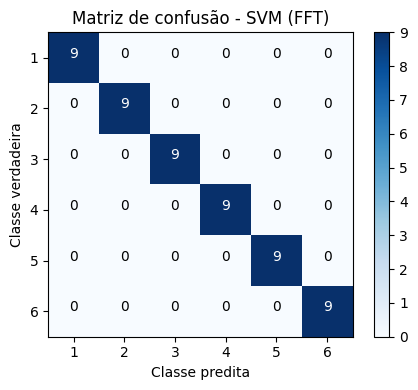

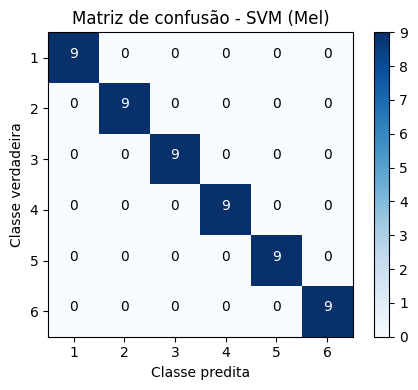

In [ ]:
# ============================================
# 1. Imports
# ============================================
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

# ============================================
# 2. Caminho dos arquivos .npy no Google Drive
# ============================================
BASE_DIR = "/content/"

X_fft_path = os.path.join(BASE_DIR, "X_fft.npy")
X_mel_path = os.path.join(BASE_DIR, "X_mel.npy")
y_path     = os.path.join(BASE_DIR, "y_labels.npy")

X_fft = np.load(X_fft_path)
X_mel = np.load(X_mel_path)
y     = np.load(y_path)

print("Formatos carregados:")
print("X_fft:", X_fft.shape)
print("X_mel:", X_mel.shape)
print("y:", y.shape)

# ============================================
# 3. Função auxiliar para treinar e avaliar SVM
# ============================================
def treinar_avaliar_svm(X, y, descricao=""):
    """
    Divide em treino/teste, treina SVM com kernel RBF
    e retorna acurácia, matriz de confusão e relatório.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Pipeline: padronização + SVM (RBF)
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=10.0, gamma="scale"))
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=3)

    print("="*60)
    print(f"Resultados para: {descricao}")
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de confusão:")
    print(cm)
    print("\nRelatório de classificação:")
    print(report)

    return clf, acc, cm, (y_test, y_pred)

# ============================================
# 4. Treinar e avaliar com FFT
# ============================================
clf_fft, acc_fft, cm_fft, (y_test_fft, y_pred_fft) = treinar_avaliar_svm(
    X_fft, y, descricao="Features FFT"
)

# ============================================
# 5. Treinar e avaliar com Mel
# ============================================
clf_mel, acc_mel, cm_mel, (y_test_mel, y_pred_mel) = treinar_avaliar_svm(
    X_mel, y, descricao="Features Mel"
)

print("="*60)
print("Comparação final de acurácia:")
print(f"FFT: {acc_fft:.4f}")
print(f"Mel: {acc_mel:.4f}")

# ============================================
# 6. Função para plotar matriz de confusão
# ============================================
def plot_confusion_matrix(cm, classes, titulo="Matriz de confusão"):
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    # valores nas células
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(
                j, i, str(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black"
            )

    plt.ylabel("Classe verdadeira")
    plt.xlabel("Classe predita")
    plt.tight_layout()
    plt.show()

# ============================================
# 7. Plotar matrizes de confusão FFT e Mel
# ============================================
classes_cordas = ["1", "2", "3", "4", "5", "6"]

plot_confusion_matrix(cm_fft, classes_cordas,
                      titulo="Matriz de confusão - SVM (FFT)")

plot_confusion_matrix(cm_mel, classes_cordas,
                      titulo="Matriz de confusão - SVM (Mel)")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def treinar_rf(X, y, descricao="RF"):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print("="*60)
    print(f"Resultados para: {descricao}")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Matriz de confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório:")
    print(classification_report(y_test, y_pred))

    return rf

# Testar FFT
rf_fft = treinar_rf(X_fft, y, descricao="Random Forest - FFT")

# Testar Mel
rf_mel = treinar_rf(X_mel, y, descricao="Random Forest - Mel")


Resultados para: Random Forest - FFT
Acurácia: 1.0
Matriz de confusão:
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Relatório:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Resultados para: Random Forest - Mel
Acurácia: 1.0
Matriz de confusão:
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 9 0 0 0]
 [0 0 0 9 0 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]

Relatório:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9


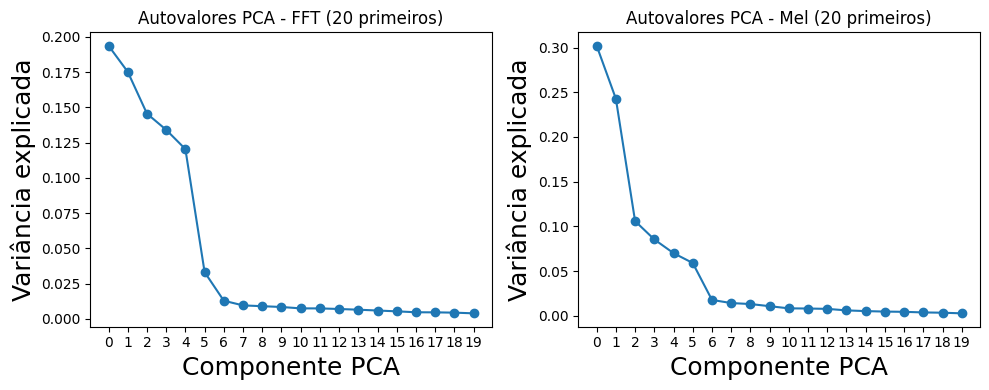

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
X_fft = np.load('X_fft.npy')
X_mel = np.load('X_mel.npy')

# PCA otimizado para FFT
pca_fft = PCA(n_components=20, svd_solver='randomized').fit(X_fft)
eig_fft = pca_fft.explained_variance_ratio_

# PCA para Mel (rápido)
pca_mel = PCA(n_components=20).fit(X_mel)
eig_mel = pca_mel.explained_variance_ratio_

# Plotar autovalores
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(eig_fft, marker='o')
plt.title("Autovalores PCA - FFT (20 primeiros)")
plt.xlabel("Componente PCA",fontsize=18)
plt.ylabel("Variância explicada",fontsize=18)
plt.xticks(range(20))

plt.subplot(1,2,2)
plt.plot(eig_mel, marker='o')
plt.title("Autovalores PCA - Mel (20 primeiros)")
plt.xlabel("Componente PCA",fontsize=18)
plt.ylabel("Variância explicada",fontsize=18)
plt.xticks(range(20))
plt.tight_layout()
plt.show()


Dados carregados:
X_fft: (180, 1025)
X_mel: (180, 40)
y: (180,)


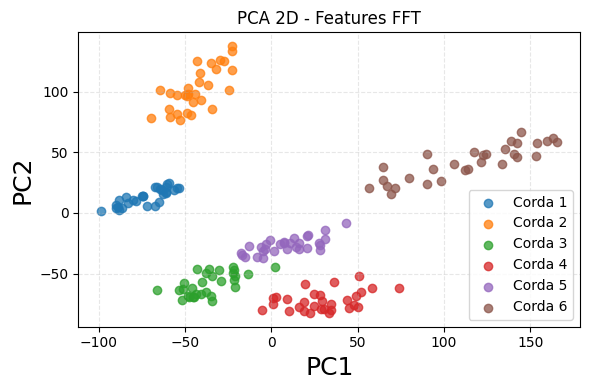

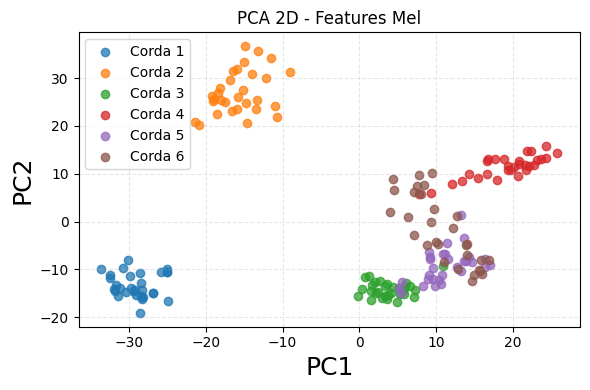

In [ ]:
# ============================================
# PCA 2D para FFT e Mel
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------------------------
# Carregar os arquivos .npy do seu Drive
# ------------------------------------------------

BASE = "/content/"

X_fft = np.load(BASE + "/X_fft.npy")
X_mel = np.load(BASE + "/X_mel.npy")
y     = np.load(BASE + "/y_labels.npy")

print("Dados carregados:")
print("X_fft:", X_fft.shape)
print("X_mel:", X_mel.shape)
print("y:", y.shape)

# ------------------------------------------------
# PCA 2D para FFT
# ------------------------------------------------
pca_fft = PCA(n_components=2)
X_fft_2d = pca_fft.fit_transform(X_fft)

# ------------------------------------------------
# PCA 2D para Mel
# ------------------------------------------------
pca_mel = PCA(n_components=2)
X_mel_2d = pca_mel.fit_transform(X_mel)

# ------------------------------------------------
# Função de plot
# ------------------------------------------------
def plot_pca(X2d, y, titulo):
    plt.figure(figsize=(6,4))
    for corda in np.unique(y):
        idx = (y == corda)
        plt.scatter(
            X2d[idx, 0], X2d[idx, 1],
            label=f"Corda {corda}", alpha=0.75
        )
    plt.xlabel("PC1",fontsize=18)
    plt.ylabel("PC2",fontsize=18)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# ------------------------------------------------
# Plotar os dois gráficos
# ------------------------------------------------
plot_pca(X_fft_2d, y, "PCA 2D - Features FFT")
plot_pca(X_mel_2d, y, "PCA 2D - Features Mel")


Dados carregados:
X_fft: (180, 1025)
X_mel: (180, 40)
y: (180,)
Adjusted Rand Index (FFT): 1.0000
Adjusted Rand Index (Mel): 0.9865


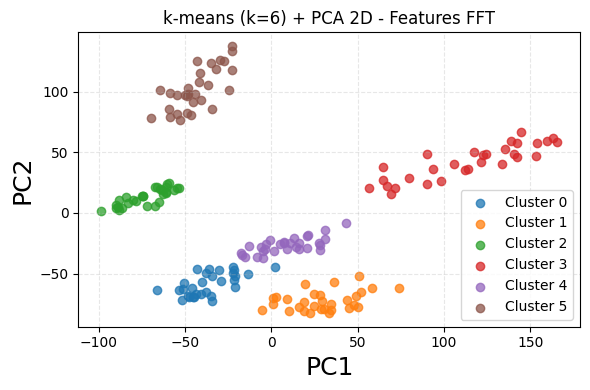

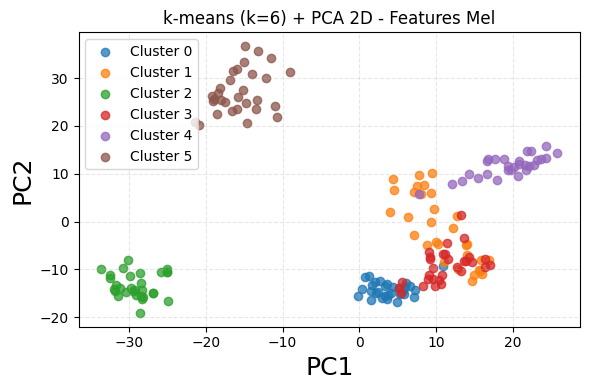

In [ ]:
# ============================================
# k-means + PCA 2D para FFT e Mel
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# --------------------------------------------
# 1. Caminho da pasta no Google Drive
# --------------------------------------------
BASE_DIR = "/content"

X_fft = np.load(BASE_DIR + "/X_fft.npy")
X_mel = np.load(BASE_DIR + "/X_mel.npy")
y     = np.load(BASE_DIR + "/y_labels.npy")

print("Dados carregados:")
print("X_fft:", X_fft.shape)
print("X_mel:", X_mel.shape)
print("y:", y.shape)

# --------------------------------------------
# 2. Função auxiliar para rodar k-means e PCA
# --------------------------------------------
def kmeans_pca_2d(X, n_clusters=6, random_state=42):
    """
    Aplica k-means em X e projeta em 2D com PCA.
    Retorna:
      - X_2d: projeção 2D
      - labels_km: rótulos dos clusters
    """
    # k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels_km = kmeans.fit_predict(X)

    # PCA 2D
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    return X_2d, labels_km

# --------------------------------------------
# 3. Rodar k-means + PCA para FFT e Mel
# --------------------------------------------
X_fft_2d, labels_fft_km = kmeans_pca_2d(X_fft, n_clusters=6)
X_mel_2d, labels_mel_km = kmeans_pca_2d(X_mel, n_clusters=6)

# (Opcional) Medir quão bem os clusters batem com as cordas reais
ari_fft = adjusted_rand_score(y, labels_fft_km)
ari_mel = adjusted_rand_score(y, labels_mel_km)
print(f"Adjusted Rand Index (FFT): {ari_fft:.4f}")
print(f"Adjusted Rand Index (Mel): {ari_mel:.4f}")

# --------------------------------------------
# 4. Função para plotar PCA 2D colorido por k-means
# --------------------------------------------
def plot_pca_kmeans(X2d, labels_km, titulo):
    plt.figure(figsize=(6,4))
    n_clusters = len(np.unique(labels_km))
    for c in range(n_clusters):
        idx = (labels_km == c)
        plt.scatter(
            X2d[idx, 0], X2d[idx, 1],
            label=f"Cluster {c}",
            alpha=0.75
        )
    plt.xlabel("PC1",fontsize=18)
    plt.ylabel("PC2",fontsize=18)
    plt.title(titulo)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

# --------------------------------------------
# 5. Gerar as duas figuras
# --------------------------------------------

# Figura 1: k-means em FFT
plot_pca_kmeans(X_fft_2d, labels_fft_km,
                "k-means (k=6) + PCA 2D - Features FFT")

# Figura 2: k-means em Mel
plot_pca_kmeans(X_mel_2d, labels_mel_km,
                "k-means (k=6) + PCA 2D - Features Mel")


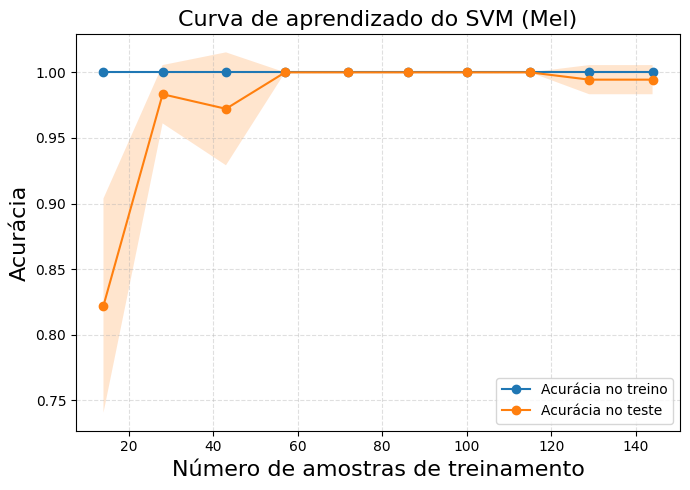

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# carregar features Mel (mais compactas)
X = np.load("X_mel.npy")
y = np.load("y_labels.npy")

# pipeline: normalização + SVM RBF
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma="scale"))
])

# gerar curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    shuffle=True,
    random_state=42
)

# média e desvio padrão
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

train_std  = train_scores.std(axis=1)
test_std   = test_scores.std(axis=1)

# plot
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label="Acurácia no treino")
plt.plot(train_sizes, test_mean, 'o-', label="Acurácia no teste")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Número de amostras de treinamento",fontsize = 16)
plt.ylabel("Acurácia",fontsize = 16)
plt.title("Curva de aprendizado do SVM (Mel)",fontsize = 16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


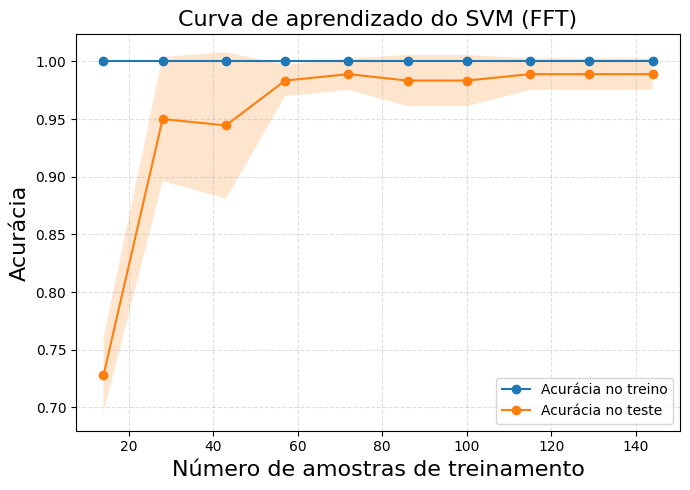

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# carregar features Mel (mais compactas)
X = np.load("X_fft.npy")
y = np.load("y_labels.npy")

# pipeline: normalização + SVM RBF
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma="scale"))
])

# gerar curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    shuffle=True,
    random_state=42
)

# média e desvio padrão
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

train_std  = train_scores.std(axis=1)
test_std   = test_scores.std(axis=1)

# plot
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label="Acurácia no treino")
plt.plot(train_sizes, test_mean, 'o-', label="Acurácia no teste")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Número de amostras de treinamento",fontsize=16)
plt.ylabel("Acurácia",fontsize=16)
plt.title("Curva de aprendizado do SVM (FFT)",fontsize=16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


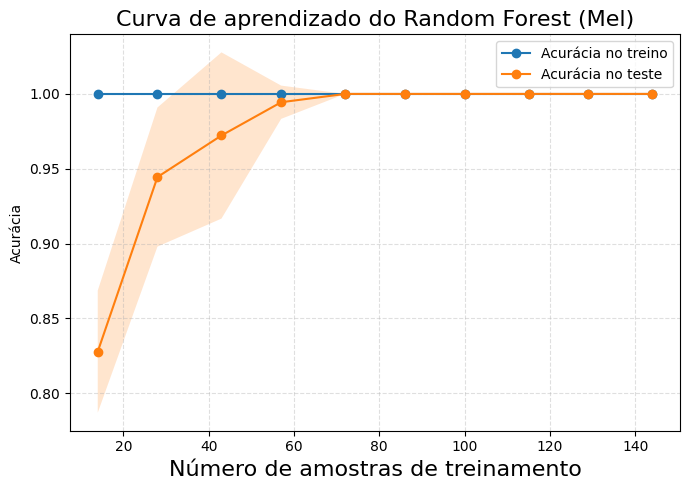

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# carregar as features (use Mel ou FFT)
X = np.load("X_mel.npy")
y = np.load("y_labels.npy")

# pipeline: normalização + Random Forest
model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

# gerar curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    shuffle=True,
    random_state=42
)

# médias e desvios padrão
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_std   = test_scores.std(axis=1)

# plot
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label="Acurácia no treino")
plt.plot(train_sizes, test_mean, 'o-', label="Acurácia no teste")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Número de amostras de treinamento",fontsize=16)
plt.ylabel("Acurácia")
plt.title("Curva de aprendizado do Random Forest (Mel)",fontsize=16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


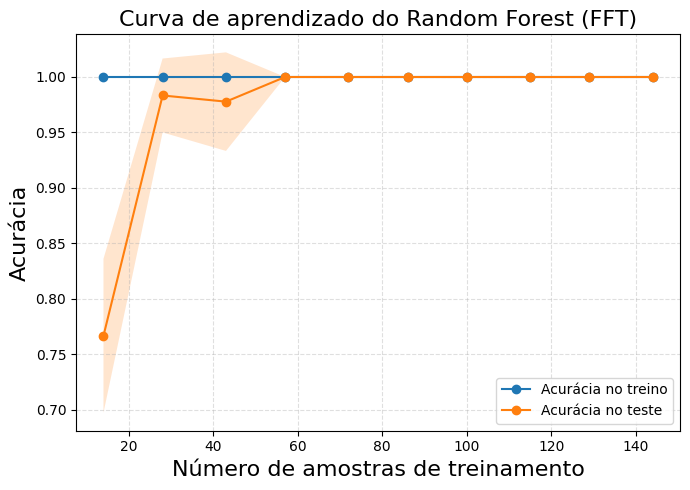

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# carregar as features (use Mel ou FFT)
X = np.load("X_fft.npy")
y = np.load("y_labels.npy")

# pipeline: normalização + Random Forest
model = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

# gerar curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    shuffle=True,
    random_state=42
)

# médias e desvios padrão
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
test_std   = test_scores.std(axis=1)

# plot
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label="Acurácia no treino")
plt.plot(train_sizes, test_mean, 'o-', label="Acurácia no teste")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Número de amostras de treinamento",fontsize = 16)
plt.ylabel("Acurácia",fontsize=16)
plt.title("Curva de aprendizado do Random Forest (FFT)",fontsize = 16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
